In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("../data/Results.csv")

In [3]:
df.Fastest = df.Fastest.map(dict(Yes=1, No=0))
df.Cheapest = df.Cheapest.map(dict(Yes=1, No=0))
df.Comfortable = df.Comfortable.map(dict(Yes=1, No=0))
df.OnlyOption = df.OnlyOption.map(dict(Yes=1, No=0))
df.Environmental = df.Environmental.map(dict(Yes=1, No=0))
df.Healthiest = df.Healthiest.map(dict(Yes=1, No=0))
df.OtherTrips = df.OtherTrips.map(dict(Yes=1, No=0))

In [4]:
df = df.replace(np.nan, "")

In [5]:
df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")

C:\Users\joanv\AppData\Local\Temp\ipykernel_19572\2345579929.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Center = df.Center.str.replace(r"[\w\s,]*\((.*)\)",r"\1")


In [6]:
df[df["Center"] == "Barcelona School of Informatics (FIB)"]["GoStage1"].unique()

array([], dtype=object)

In [7]:
pt = df.pivot_table(index="Center", columns="GoStage1", aggfunc="count", fill_value=0)["Answer"]
pt

GoStage1,,Bicycle,Bus,Combustion or electric motorcycle with non-renewable source charging,"Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),",Electric motorcycle,Electric vehicle (with Zero label and renewable source charging),FGC,On foot,Renfe,Scooter (or other micro-mobility devices) with non-renewable charging,Scooter (or other micro-mobility devices) with renewable charging,Taxi,Tram,Underground
Center,,,,,,,,,,,,,,,
EEABB,5,3,6,3,9,0,0,1,20,6,0,2,0,0,5
EEBE,6,12,19,13,12,0,0,3,56,16,2,0,1,3,18
EETAC,3,0,14,2,9,0,2,1,26,6,0,0,0,1,5
EPSEB,8,1,11,4,4,0,0,0,21,4,0,0,0,0,10
EPSEM,5,0,4,3,22,0,1,1,24,1,0,0,0,0,0
EPSEVG,6,1,4,3,6,0,1,0,29,5,0,0,0,0,1
ESEIAAT,7,2,11,7,46,1,2,4,92,6,0,1,1,0,3
ETSAB,6,6,11,7,5,0,1,4,53,3,0,1,0,3,15
ETSAV,2,1,3,4,11,0,1,1,15,0,1,1,0,0,6


In [8]:
df

,Unnamed: 0,Answer,Gender,Center,Year,Days,ZipCode,GoStage1,GoStage2,GoStage3,...,BackStage2,BackStage3,Fastest,Cheapest,Comfortable,OnlyOption,Environmental,Healthiest,OtherTrips,Other
0,0,11,Man,ESEIAAT,Third,5,8302.0,Bus,FGC,On foot,...,,,0,0,0,1,0,0,0,
1,1,12,Woman,ETSAB,First,3,8290.0,"Combustion vehicle (non-plug-in hybrid, electr...","Combustion vehicle (non-plug-in hybrid, electr...","Combustion vehicle (non-plug-in hybrid, electr...",...,,,0,0,0,0,0,0,1,
2,2,16,Man,ETSEIB,First,5,8397.0,Combustion or electric motorcycle with non-ren...,Renfe,Underground,...,,,0,1,0,0,1,0,0,
3,3,31,Man,EPSEM,Second,4,8243.0,On foot,On foot,On foot,...,,,1,0,0,0,1,0,0,
4,4,36,Woman,ETSAB,Fourth,2,8401.0,Renfe,Underground,,...,,,0,0,0,1,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1443,2963,NR/DK,FIB,Fourth,3,8041.0,Underground,Underground,,...,,,1,1,0,0,0,0,0,
1444,1444,2964,Woman,EPSEB,Fourth,4,8912.0,Underground,Renfe,"Combustion vehicle (non-plug-in hybrid, electr...",...,,,0,0,0,0,0,0,0,Because I can't enter Barcelona with my car be...
1445,1445,2965,Woman,FME,First,5,8023.0,Underground,,,...,,,1,0,1,0,0,0,0,
1446,1446,2966,Woman,FOOT,Third,5,8015.0,Underground,Renfe,On foot,...,,,1,1,0,0,0,0,0,


In [9]:
changes = {
    "FGC" : 2 ,
    "On foot" : 14 ,
    "Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging)," : 11 ,
    "Underground" : 7 ,
    "Bus" : 3 ,
    "Combustion or electric motorcycle with non-renewable source charging" : 11 ,
    "Renfe" : 1 ,
    "Tram" : 8 ,
    "Bicycle" : 13 ,
    "Taxi" : 10 ,
    "Electric motorcycle" : 11 ,
    "Scooter (or other micro-mobility devices) with renewable charging" : 12 ,
    "Scooter (or other micro-mobility devices) with non-renewable charging" : 12 ,
    "Electric vehicle (with Zero label and renewable source charging)" : 11 ,
    "" : 100 ,
}
changes

{'FGC': 2,
 'On foot': 14,
 'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),': 11,
 'Underground': 7,
 'Bus': 3,
 'Combustion or electric motorcycle with non-renewable source charging': 11,
 'Renfe': 1,
 'Tram': 8,
 'Bicycle': 13,
 'Taxi': 10,
 'Electric motorcycle': 11,
 'Scooter (or other micro-mobility devices) with renewable charging': 12,
 'Scooter (or other micro-mobility devices) with non-renewable charging': 12,
 'Electric vehicle (with Zero label and renewable source charging)': 11,
 '': 100}

In [10]:
df[["GoStage1","GoStage2","GoStage3"] ] = df[["GoStage1","GoStage2","GoStage3"] ].replace(changes)

In [11]:
df["GoStage"] = df[["GoStage1","GoStage2","GoStage3"] ].min( axis = 1)

In [12]:
changes_back2 = {
    2 : "Público" ,
    1 : "Público",
    3 : "Público",
    8 : "Público",
    7 : "Público",
    10 : "Privado",
    11 : "Privado",
    12 : "Privado",
    13 : "Activa",
    14 : "Activa",
    100 : "" 
}
changes_back2

{2: 'Público',
 1: 'Público',
 3: 'Público',
 8: 'Público',
 7: 'Público',
 10: 'Privado',
 11: 'Privado',
 12: 'Privado',
 13: 'Activa',
 14: 'Activa',
 100: ''}

In [13]:
df["GoStage"] = df["GoStage"].replace( changes_back2)

In [14]:
df = df.drop( ["GoStage1","GoStage2","GoStage3" ] , axis = 1 )

In [15]:
changes_center = {
    "FIB" : "Nord",
    "ETSETB" : "Nord",
    "ETSECCPB" : "Nord",
    "ETSEIB" : "Sud",
    "ETSAB" : "Sud",
    "FME" : "Sud",
    "EPSEB" : "Sud",
    "FNB" : "Nàutica",
    "EEBE" : "Besòs",
    "EETAC" : "Castelldefels",
    "EEABB" : "Castelldefels",
    "ESEIAAT" : "Terrassa",
    "FOOT" : "Terrassa",
    "EPSEM" : "Manresa"
}

In [16]:
df["Center"] = df["Center"].replace( changes_center)

In [17]:
df

,Unnamed: 0,Answer,Gender,Center,Year,Days,ZipCode,SameBack,BackStage1,BackStage2,BackStage3,Fastest,Cheapest,Comfortable,OnlyOption,Environmental,Healthiest,OtherTrips,Other,GoStage
0,0,11,Man,Terrassa,Third,5,8302.0,No,"Combustion vehicle (non-plug-in hybrid, electr...",,,0,0,0,1,0,0,0,,Público
1,1,12,Woman,Sud,First,3,8290.0,Yes,,,,0,0,0,0,0,0,1,,Privado
2,2,16,Man,Sud,First,5,8397.0,Yes,,,,0,1,0,0,1,0,0,,Público
3,3,31,Man,Manresa,Second,4,8243.0,Yes,,,,1,0,0,0,1,0,0,,Activa
4,4,36,Woman,Sud,Fourth,2,8401.0,Yes,,,,0,0,0,1,0,0,0,,Público
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1443,2963,NR/DK,Nord,Fourth,3,8041.0,Yes,,,,1,1,0,0,0,0,0,,Público
1444,1444,2964,Woman,Sud,Fourth,4,8912.0,Yes,,,,0,0,0,0,0,0,0,Because I can't enter Barcelona with my car be...,Público
1445,1445,2965,Woman,Sud,First,5,8023.0,Yes,,,,1,0,1,0,0,0,0,,Público
1446,1446,2966,Woman,Terrassa,Third,5,8015.0,Yes,,,,1,1,0,0,0,0,0,,Público


In [18]:
Centers = ["Nord","Sud","Náutica","Este","Castelldefels","Terrassa","Manresa"]; Centers
ZipCodes = df["ZipCode"].unique();
GoStages = ["Activa","Público","Privado"]

In [19]:
def pie_plot( percentages , lab ):
    plt.pyplot.pie( percentages ,  labels = lab , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
    centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
    fig = plt.pyplot.gcf()
    fig.gca().add_artist(centre_circle)
    plt.pyplot.show()

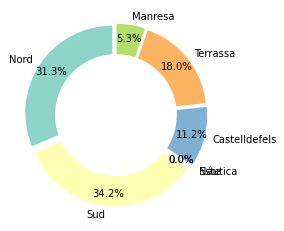

In [20]:
percentages = []
for center in Centers :
    percentages.append( sum(df["Center"]==center))
    

plt.pyplot.pie( percentages ,  labels = Centers , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

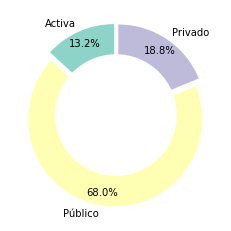

In [21]:
percentages = []
for stage in GoStages :
    percentages.append( sum(df["GoStage"]==stage))
    

plt.pyplot.pie( percentages ,  labels = GoStages , shadow = False , autopct='%1.1f%%' , pctdistance=0.85 , startangle=90 ,
              explode = 0.05 * np.ones_like(percentages) , colors=sns.color_palette('Set3'))
centre_circle = plt.pyplot.Circle((0,0),0.70,fc='white')
fig = plt.pyplot.gcf()
fig.gca().add_artist(centre_circle)
plt.pyplot.show()

8302.0


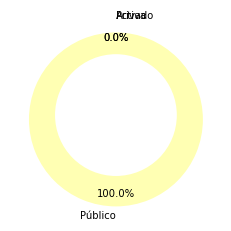

8290.0


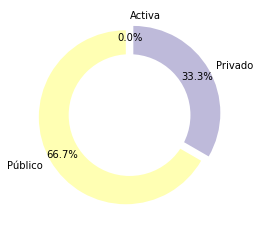

8397.0


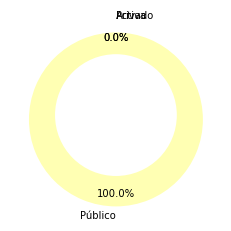

8243.0


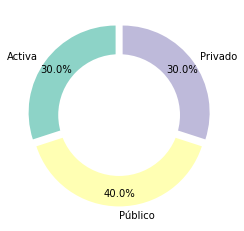

8401.0


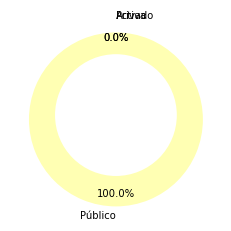

8002.0


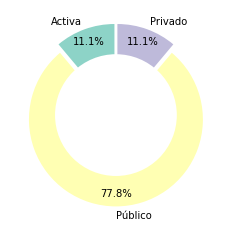

8241.0


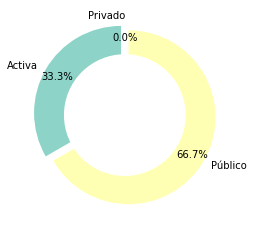

8024.0


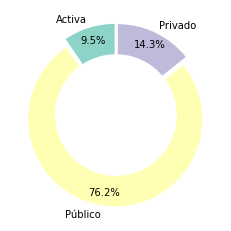

8227.0


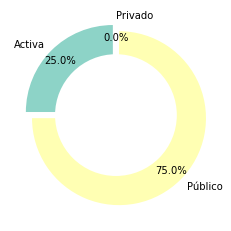

8197.0


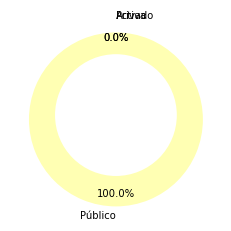

8014.0


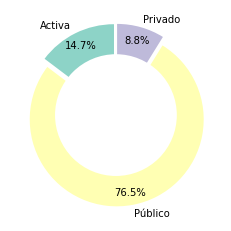

8720.0


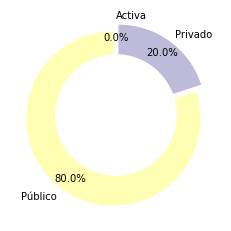

8031.0


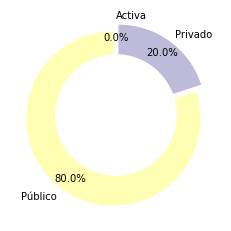

8029.0


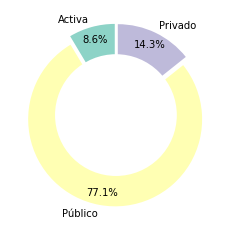

8902.0


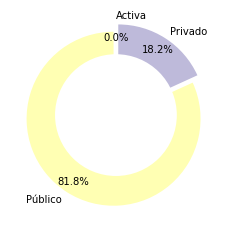

8027.0


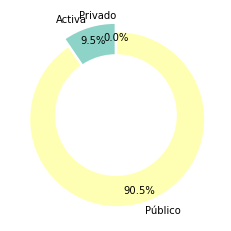

8186.0


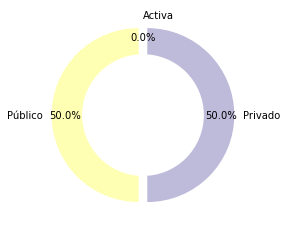

8018.0


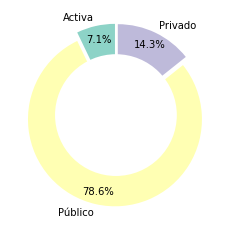

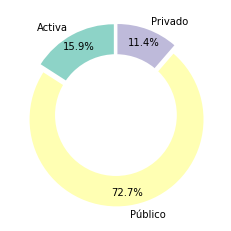

8950.0


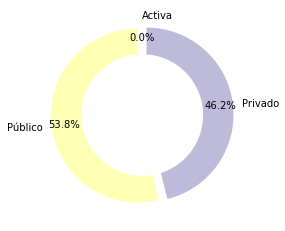

8030.0


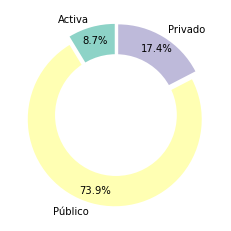

8903.0


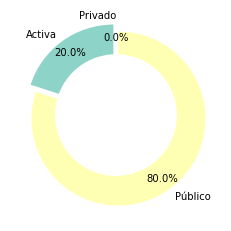

8211.0


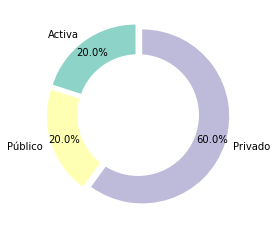

8028.0


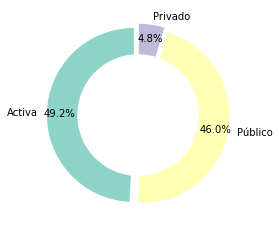

8500.0


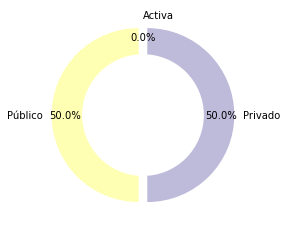

8003.0


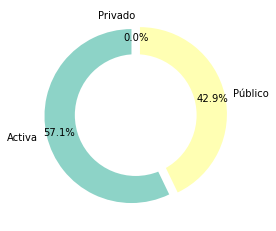

8020.0


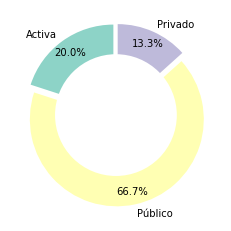

8830.0


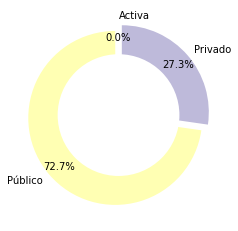

8330.0


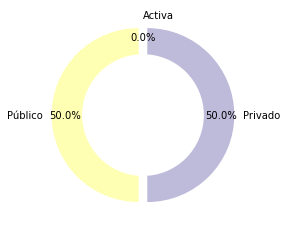

8960.0


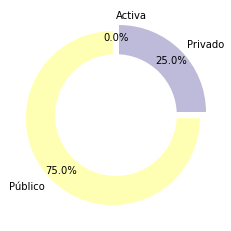

8022.0


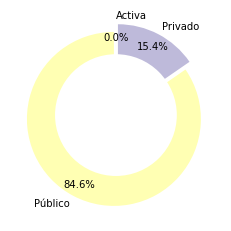

8205.0


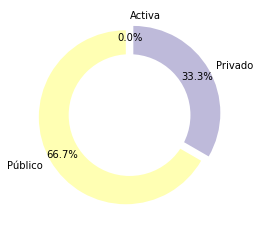

8338.0


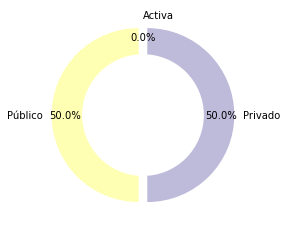

9850.0


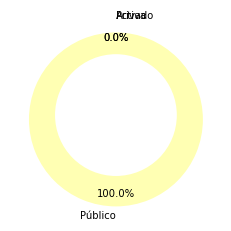

8921.0


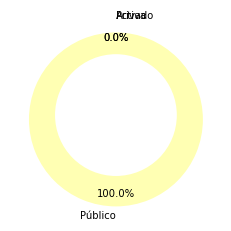

8172.0


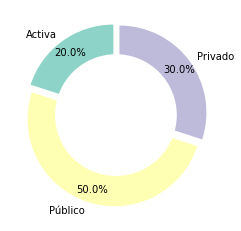

8221.0


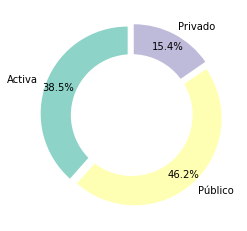

8011.0


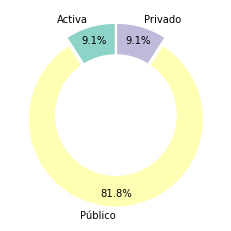

8222.0


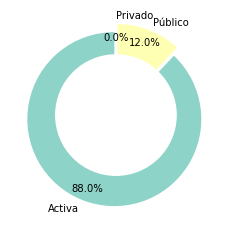

8340.0


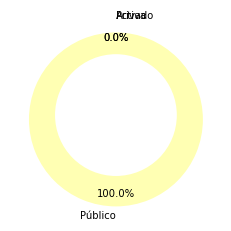

8202.0


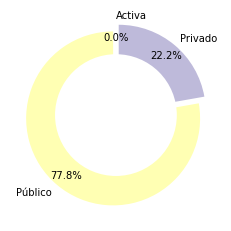

8015.0


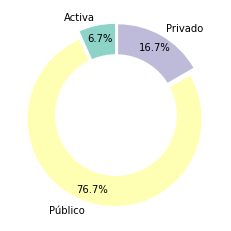

8009.0


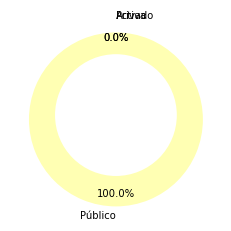

8013.0


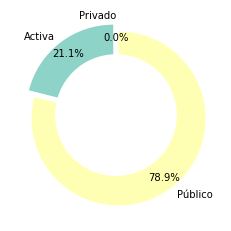

8750.0


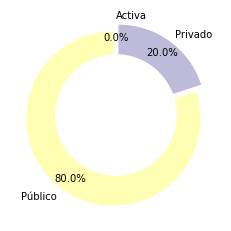

8021.0


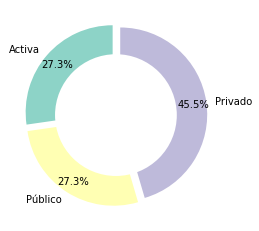

8004.0


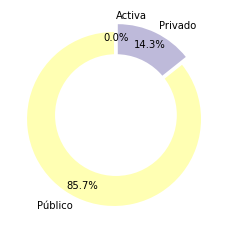

8901.0


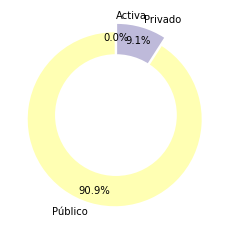

8391.0


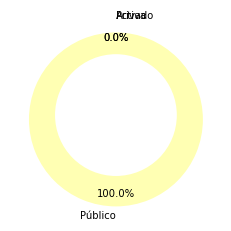

8100.0


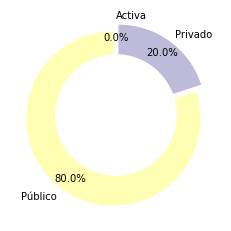

8849.0


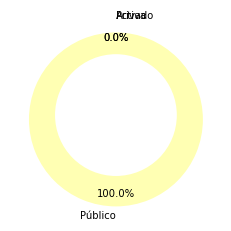

8850.0


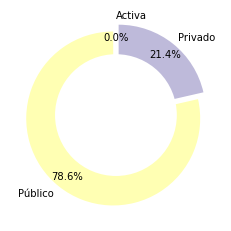

8800.0


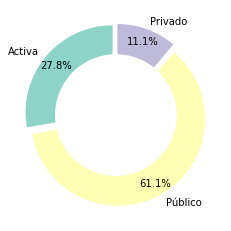

8036.0


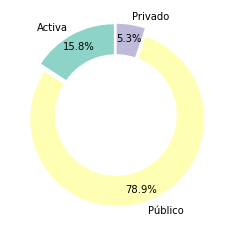

8140.0


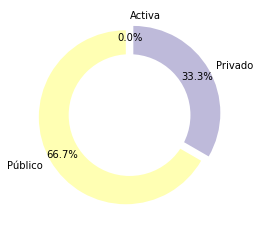

8032.0


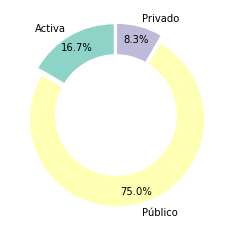

8184.0


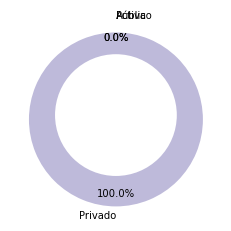

8034.0


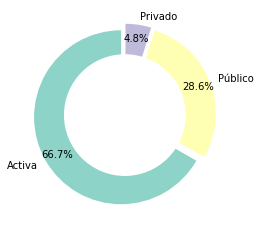

8860.0


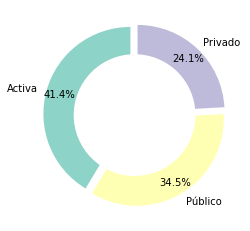

8019.0


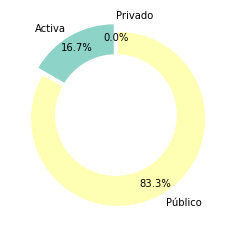

8008.0


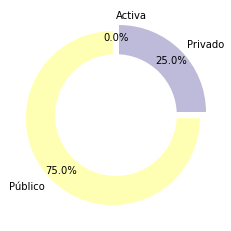

8192.0


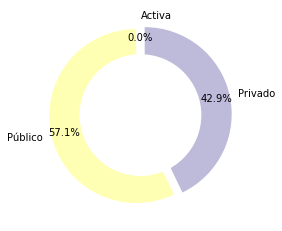

8012.0


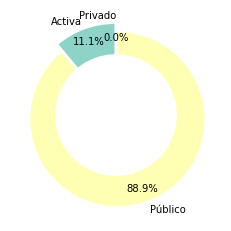

8912.0


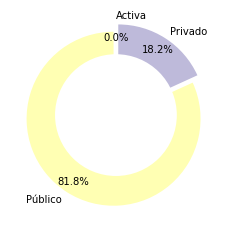

8840.0


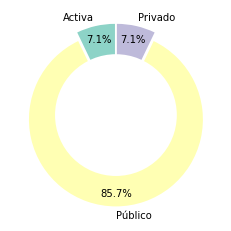

8242.0


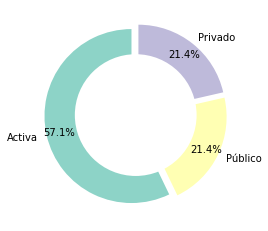

8150.0


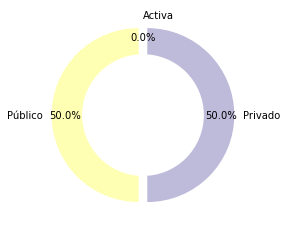

8170.0


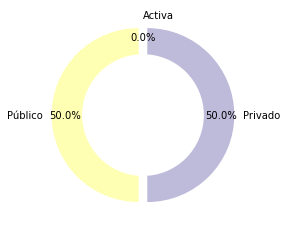

8042.0


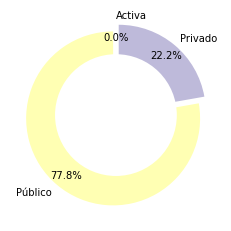

8979.0


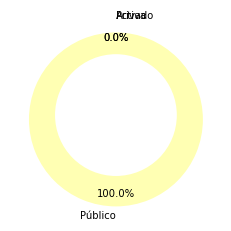

8026.0


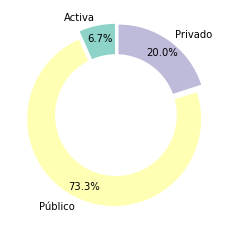

8930.0


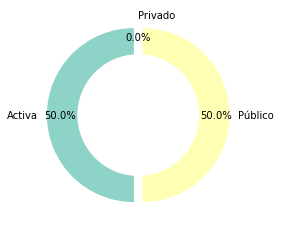

8206.0


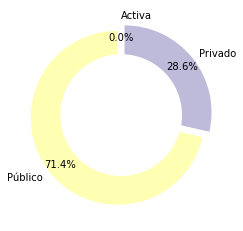

8440.0


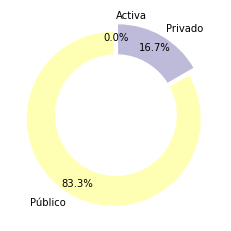

8870.0


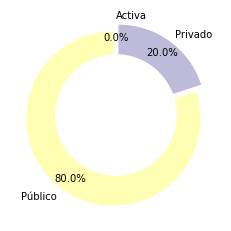

8225.0


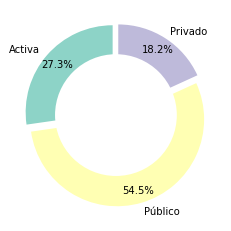

8904.0


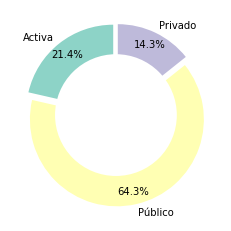

8016.0


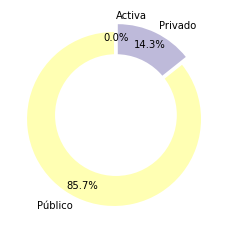

8339.0


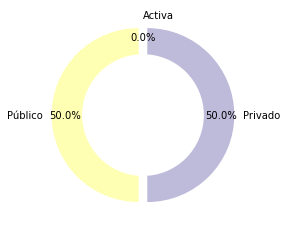

8006.0


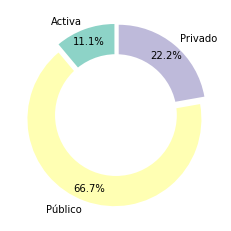

8228.0


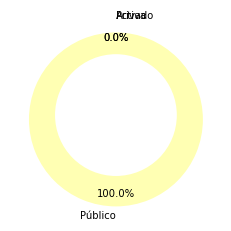

8201.0


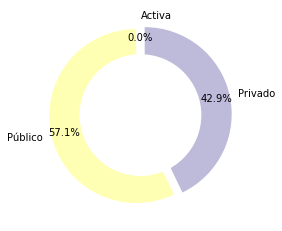

8035.0


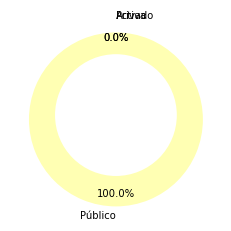

8174.0


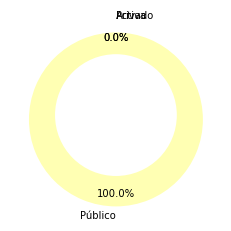

8757.0


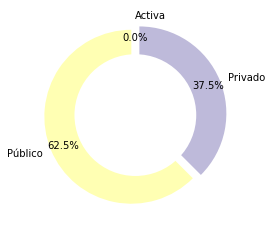

8940.0


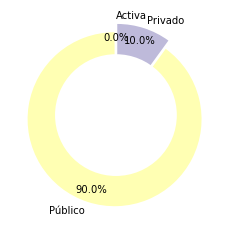

8980.0


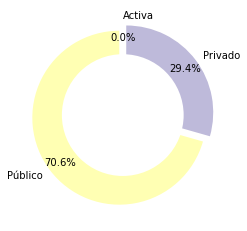

8005.0


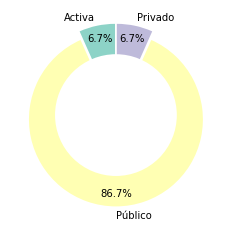

8292.0


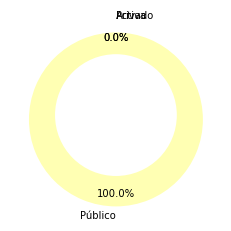

8025.0


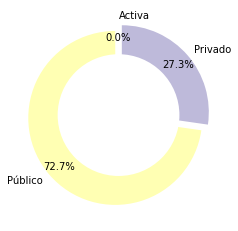

8970.0


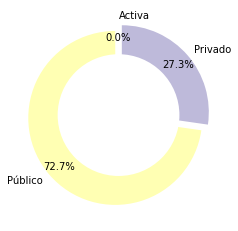

8508.0


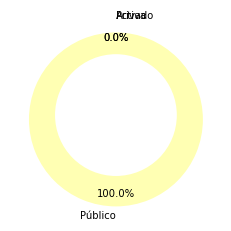

8560.0


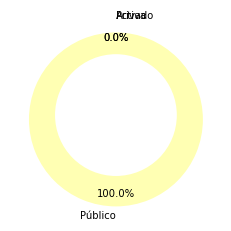

8370.0


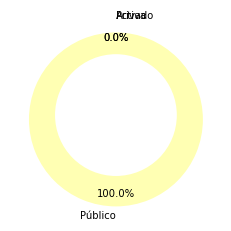

8033.0


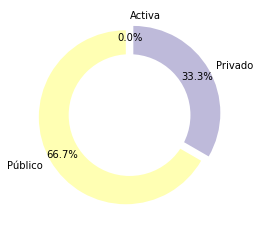

8711.0


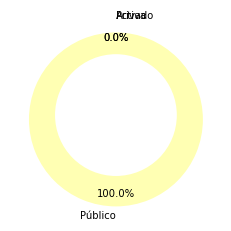

8402.0


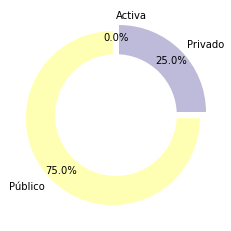

8328.0


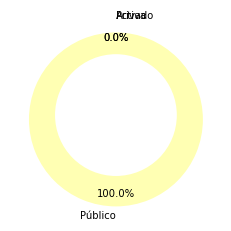

8480.0


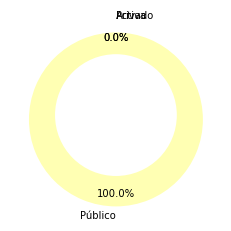

8023.0


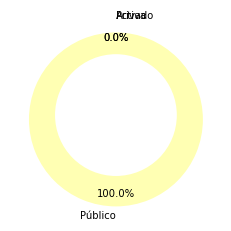

8037.0


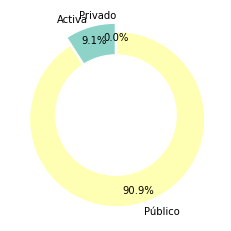

17005.0


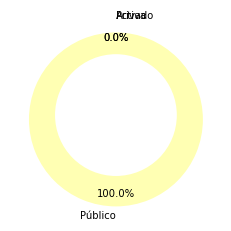

8303.0


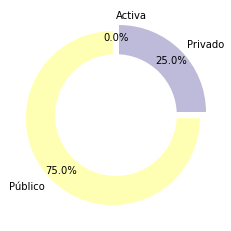

8905.0


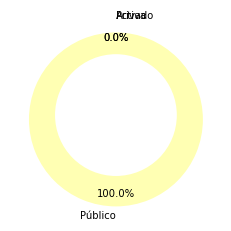

8310.0


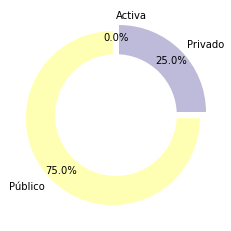

8182.0


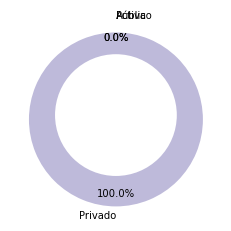

8120.0


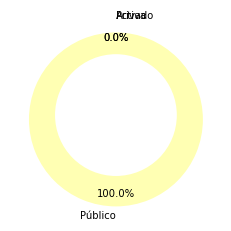

8223.0


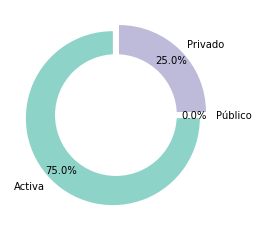

8739.0


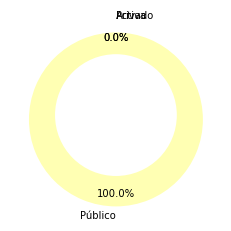

8110.0


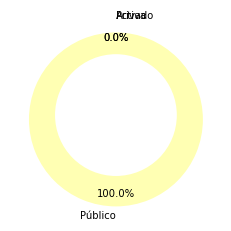

8180.0


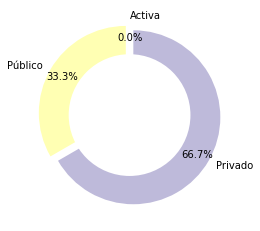

8233.0


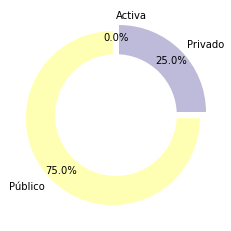

8820.0


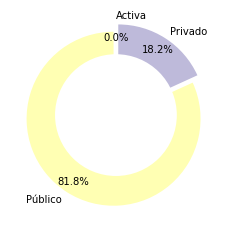

8224.0


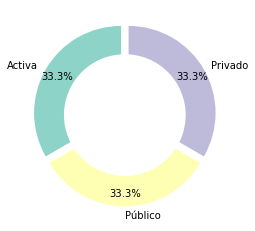

8790.0


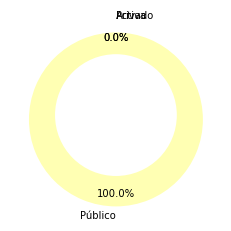

8924.0


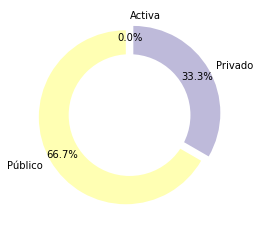

8914.0


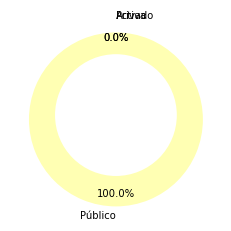

8007.0


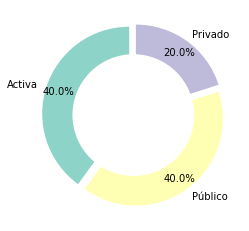

8781.0


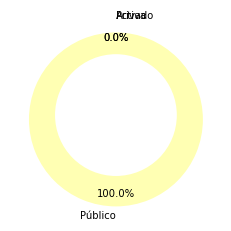

8010.0


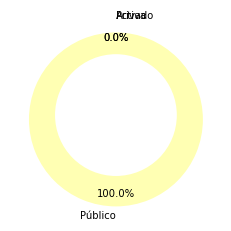

8198.0


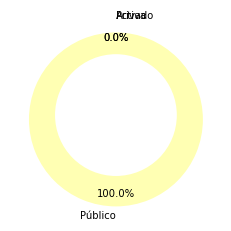

8173.0


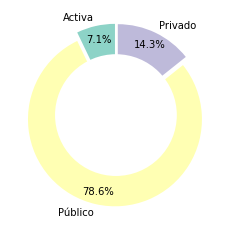

8208.0


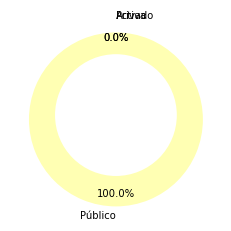

8760.0


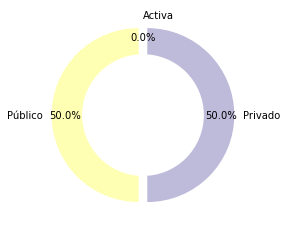

8700.0


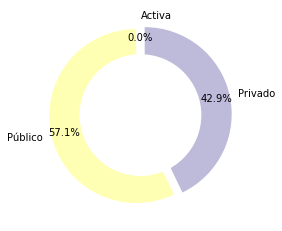

8784.0


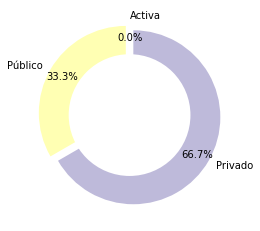

8740.0


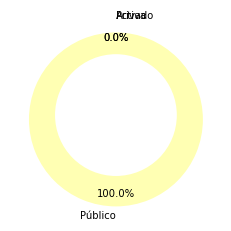

8733.0


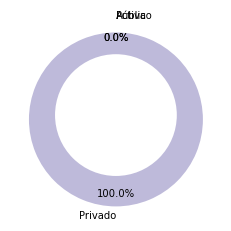

17401.0


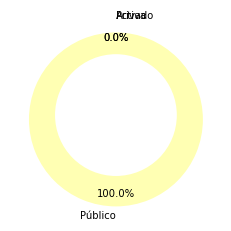

8041.0


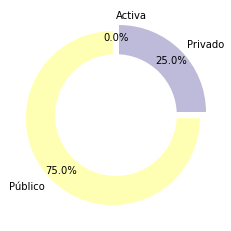

8017.0


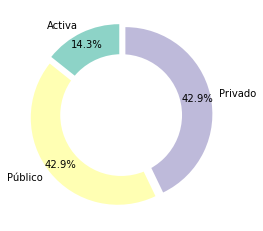

25560.0


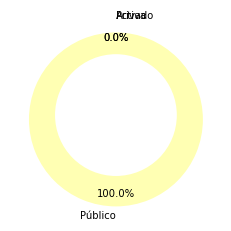

8810.0


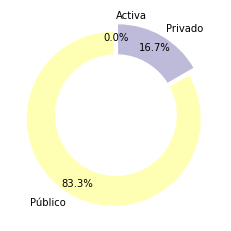

8692.0


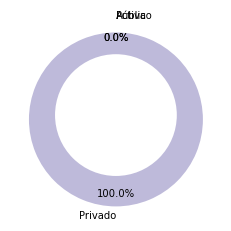

8210.0


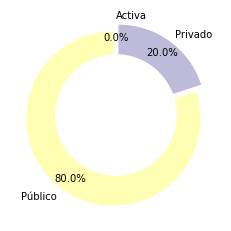

4545.0


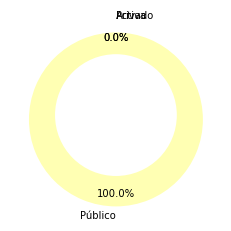

8207.0


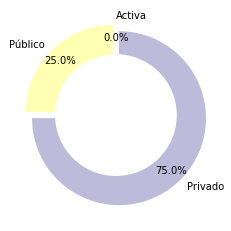

80233.0


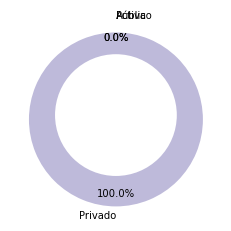

8191.0


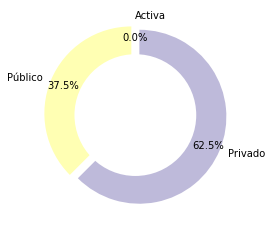

8458.0


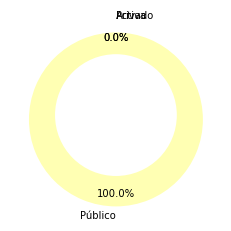

8922.0


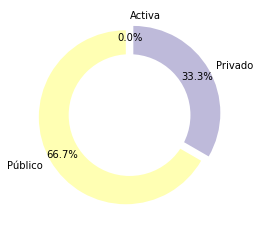

8585.0


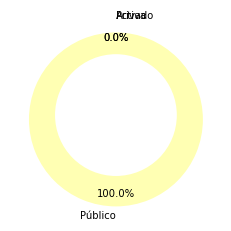

8273.0


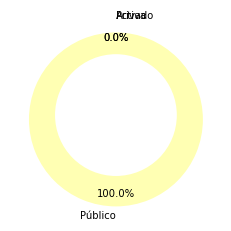

8450.0


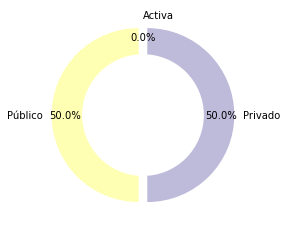

8232.0


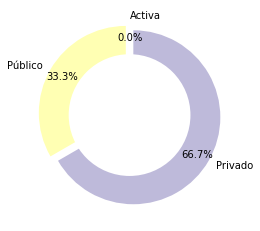

17004.0


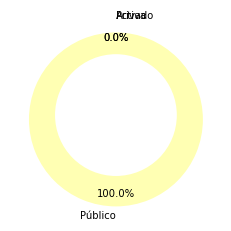

8392.0


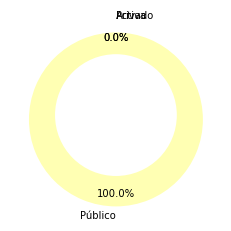

8459.0


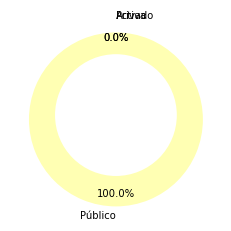

8758.0


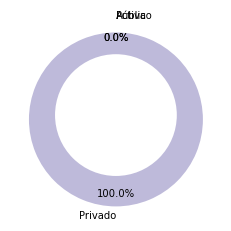

8271.0


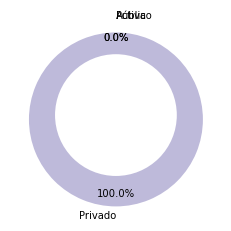

8600.0


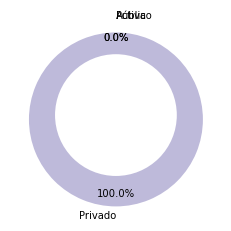

0.0


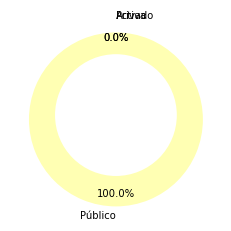

8185.0


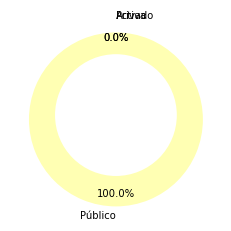

8001.0


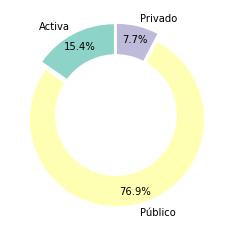

27600.0


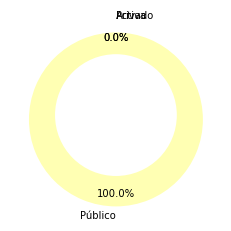

8430.0


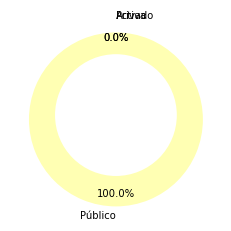

43881.0


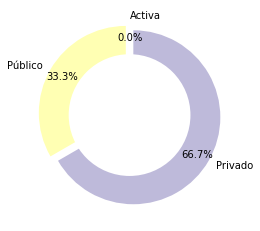

8918.0


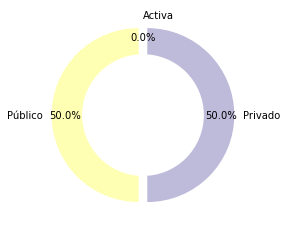

8291.0


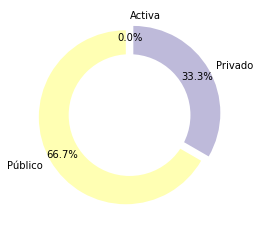

8650.0


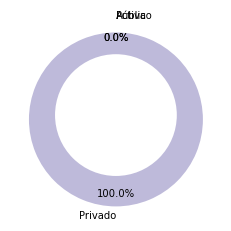

8203.0


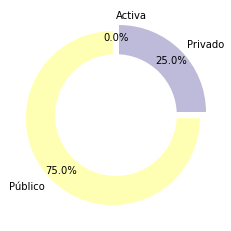

8620.0


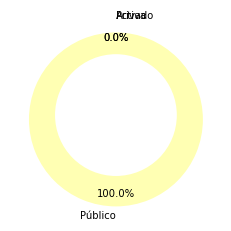

43700.0


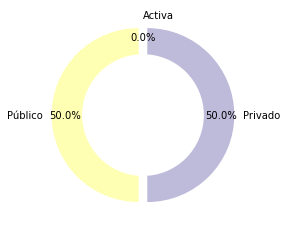

17007.0


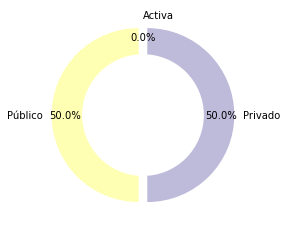

43882.0


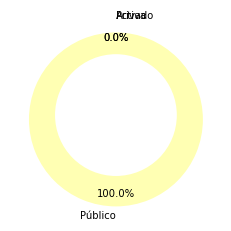

8204.0


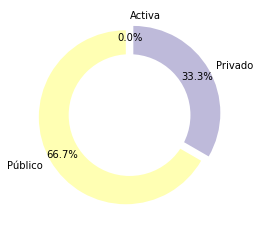

8630.0


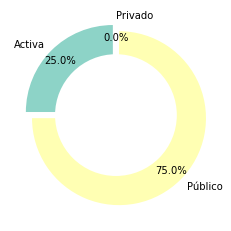

8571.0


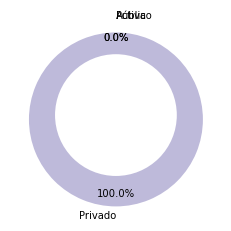

8270.0


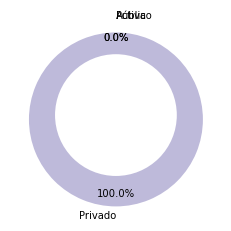

80826.0


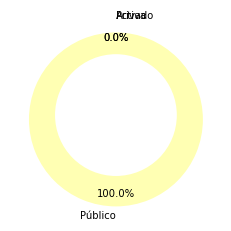

8304.0


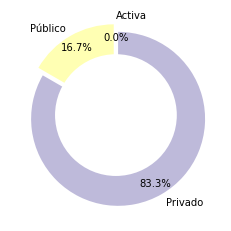

8788.0


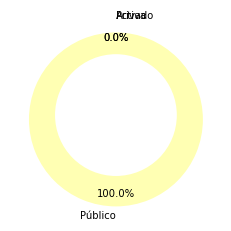

8253.0


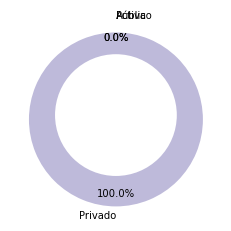

8410.0


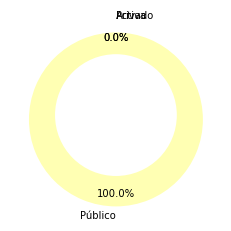

8786.0


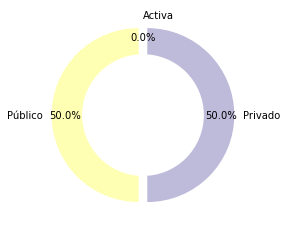

8917.0


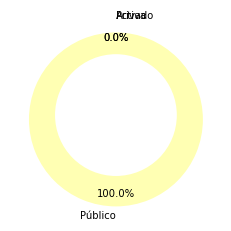

25430.0


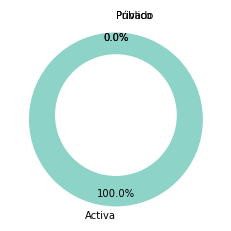

43203.0


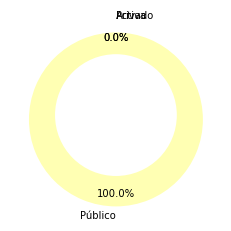

8226.0


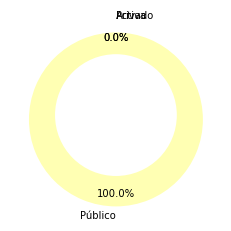

43830.0


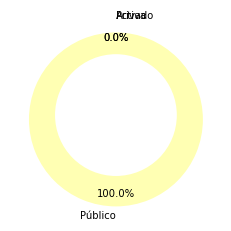

8320.0


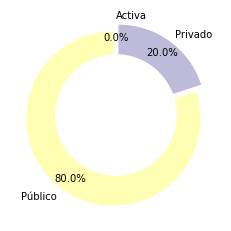

8640.0


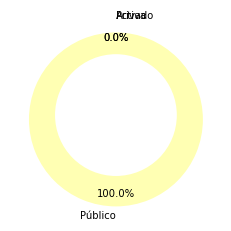

43580.0


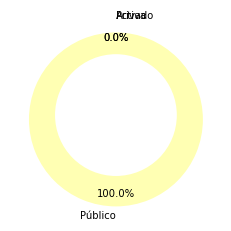

7712.0


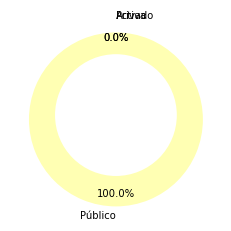

45003.0


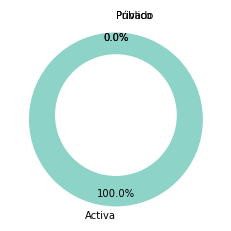

17300.0


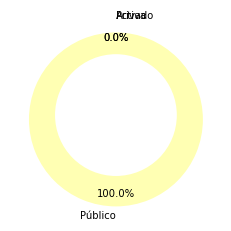

8756.0


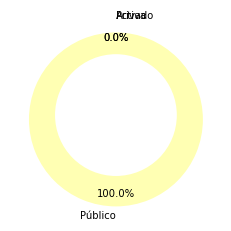

8911.0


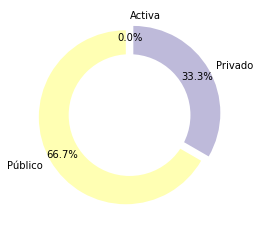

8470.0


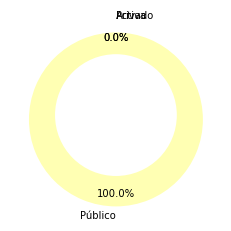

8107.0


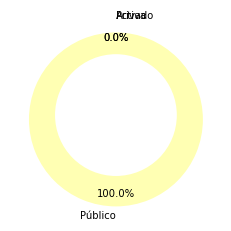

8415.0


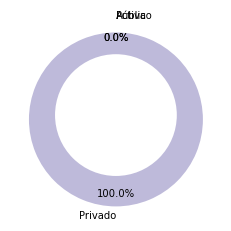

8570.0


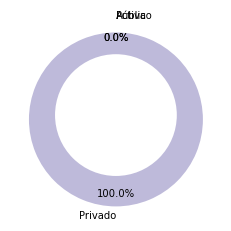

8461.0


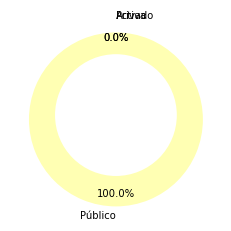

8390.0


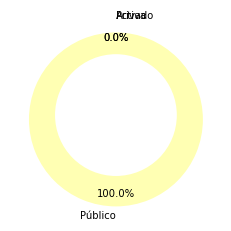

8280.0


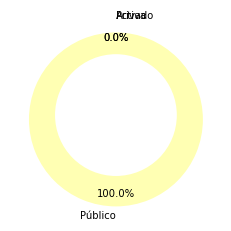

8798.0


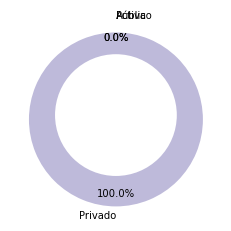

8250.0


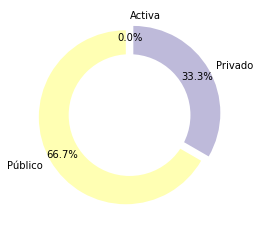

8350.0


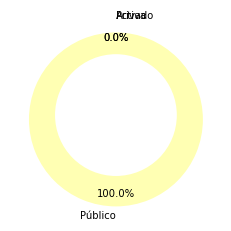

8348.0


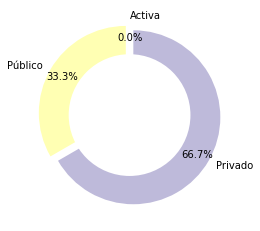

8251.0


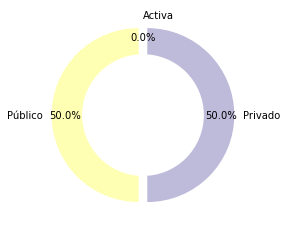

8906.0


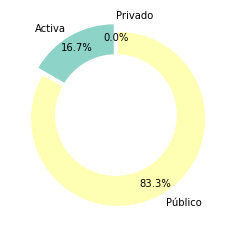

8187.0


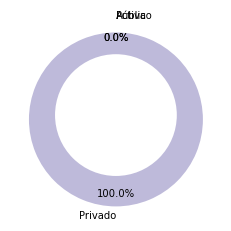

8301.0


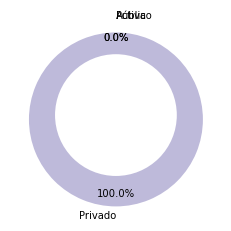

8755.0


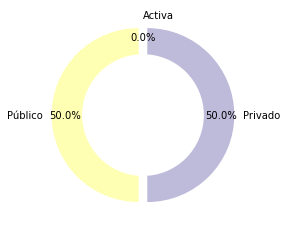

8380.0


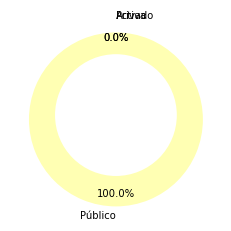

8214.0


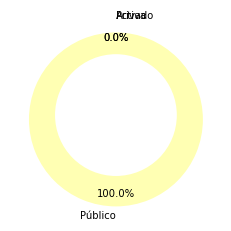

17411.0


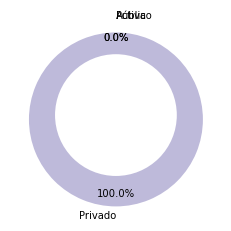

8038.0


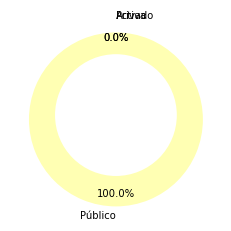

8869.0


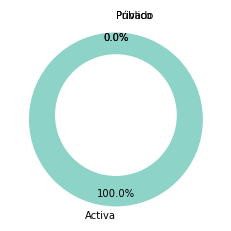

8295.0


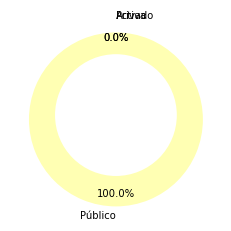

8105.0


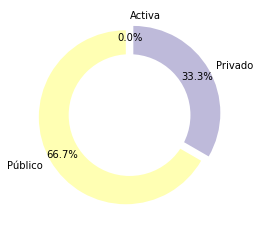

17240.0


C:\Users\joanv\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:3052: RuntimeWarning: invalid value encountered in true_divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 432x288 with 1 Axes>

In [22]:
for code in ZipCodes:
    print(code)
    percentages = []
    for stage in GoStages :
        percentages.append( sum(df[df["ZipCode"] == code]["GoStage"]==stage))
    pie_plot(percentages,GoStages)

In [ ]:
for center in Centers:
    print(center)
    percentages = []
    for stage in GoStages :
        percentages.append( sum(df[df["Center"] == center]["GoStage"]==stage))
    pie_plot(percentages,GoStages)